In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import category_encoders as ce
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.ensemble import RandomForestClassifier


import sklearn.metrics as metrics

import pickle

In [2]:
df = pd.read_csv('../datasets/Student Mental health.csv')
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [3]:
df = df.drop(['Timestamp'], axis=1)
df.head()

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [4]:
print(len(df))

101


In [5]:
print(df.duplicated().sum())

0


In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [8]:
print("Length of gpa column: ", len(df['What is your CGPA?'].unique()))
print(df["What is your CGPA?"].unique())


Length of gpa column:  6
['3.00 - 3.49' '3.50 - 4.00' '3.50 - 4.00 ' '2.50 - 2.99' '2.00 - 2.49'
 '0 - 1.99']


In [10]:
print("Length of course: ", len(df['What is your course?'].unique()))
print(df['What is your course?'].unique())


Length of course:  49
['Engineering' 'Islamic education' 'BIT' 'Laws' 'Mathemathics'
 'Pendidikan islam' 'BCS' 'Human Resources' 'Irkhs' 'Psychology' 'KENMS'
 'Accounting ' 'ENM' 'Marine science' 'KOE' 'Banking Studies'
 'Business Administration' 'Law' 'KIRKHS' 'Usuluddin ' 'TAASL' 'Engine'
 'ALA' 'Biomedical science' 'koe' 'Kirkhs' 'BENL' 'Benl' 'IT' 'CTS'
 'engin' 'Econs' 'MHSC' 'Malcom' 'Kop' 'Human Sciences ' 'Biotechnology'
 'Communication ' 'Diploma Nursing' 'Pendidikan Islam ' 'Radiography'
 'psychology' 'Fiqh fatwa ' 'DIPLOMA TESL' 'Koe' 'Fiqh'
 'Islamic Education' 'Nursing ' 'Pendidikan Islam']


In [11]:
df['Did you seek any specialist for a treatment?'].unique()


array(['No', 'Yes'], dtype=object)

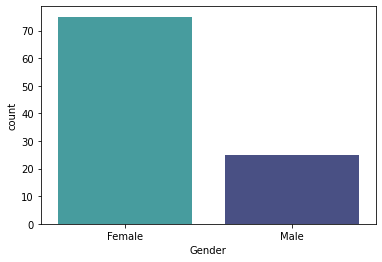

In [12]:
sns.countplot(x='Choose your gender', data=df, palette="mako_r")
plt.xlabel("Gender")
plt.show()


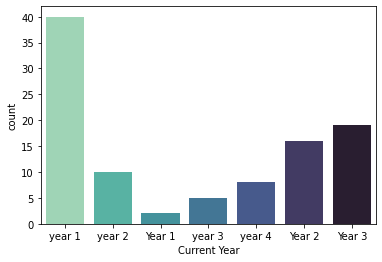

In [13]:
sns.countplot(x='Your current year of Study', data=df, palette="mako_r")
plt.xlabel("Current Year")
plt.show()


In [14]:
df['Your current year of Study'] = df['Your current year of Study'].replace(['year 1', 'year 2', 'year 3', 'year 4', 'Year 1', 'Year 2', 'Year 3', 'Year 4'], [1, 2, 3, 4,1,2,3,4])


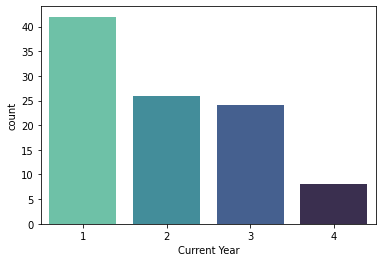

In [15]:
sns.countplot(x='Your current year of Study', data=df, palette="mako_r")
plt.xlabel("Current Year")
plt.show()


In [16]:
df.describe()

,Age,Your current year of Study
count,100.00000,100.000000
mean,20.53000,1.980000
std,2.49628,0.994734
min,18.00000,1.000000
25%,18.00000,1.000000
50%,19.00000,2.000000
75%,23.00000,3.000000
max,24.00000,4.000000


In [17]:
df.head()

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No


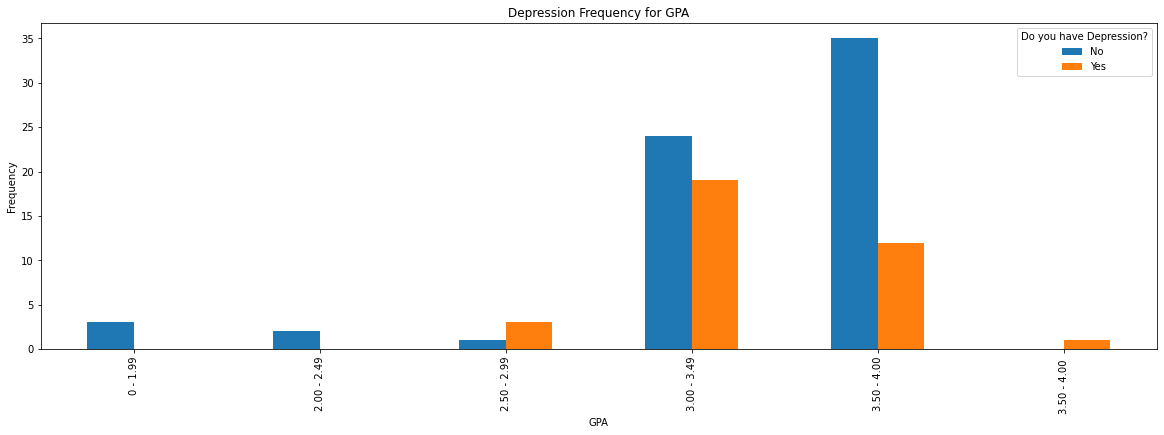

In [18]:
pd.crosstab(df['What is your CGPA?'], df['Do you have Depression?']).plot(
    kind="bar", figsize=(20, 6))
plt.title('Depression Frequency for GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()


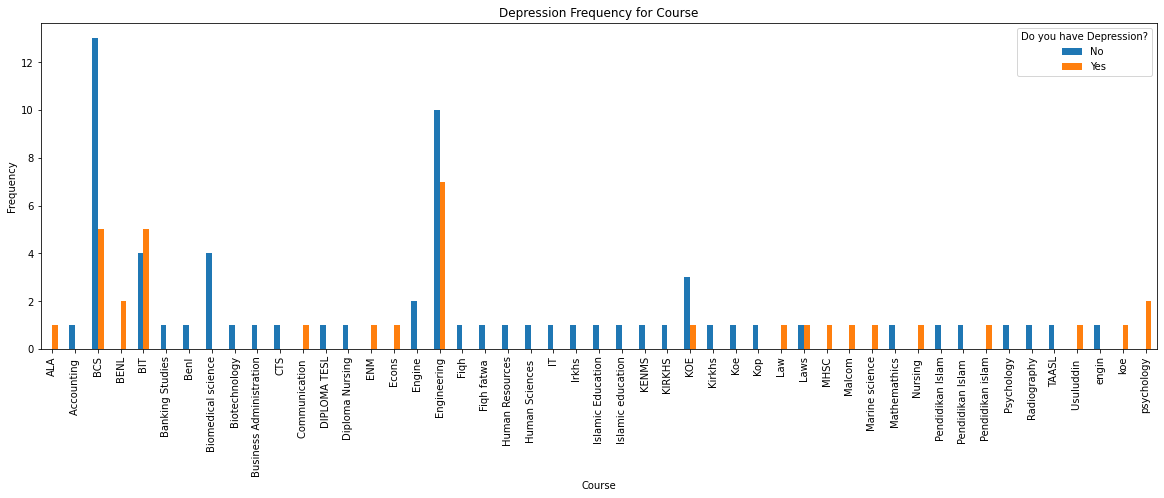

In [19]:
pd.crosstab(df['What is your course?'], df['Do you have Depression?']).plot(
    kind="bar", figsize=(20, 6))
plt.title('Depression Frequency for Course')
plt.xlabel('Course')
plt.ylabel('Frequency')
plt.show()


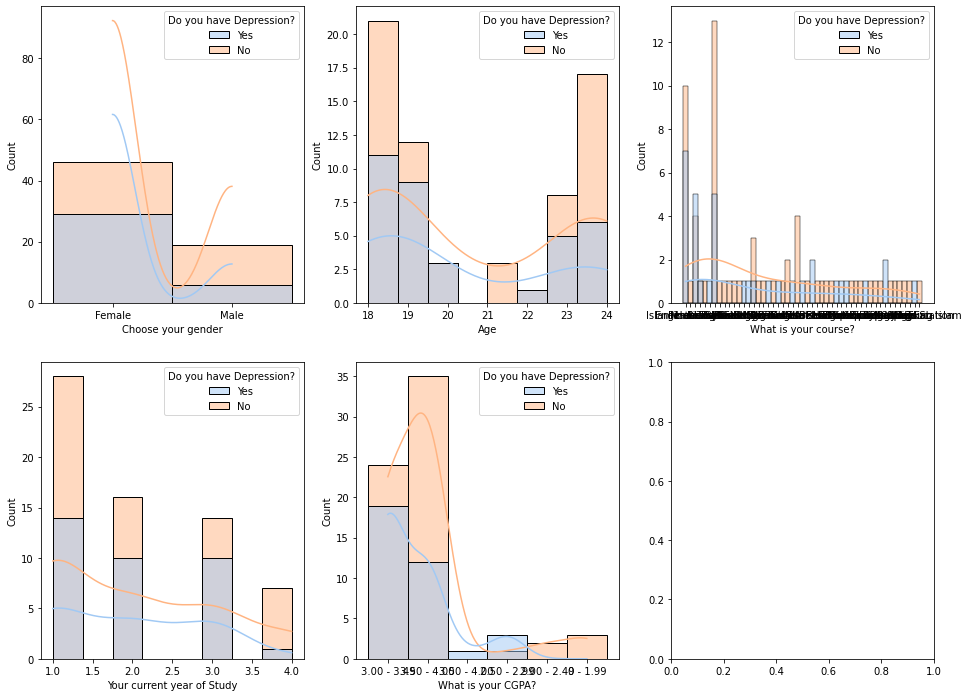

In [20]:
feature_cols = df.columns
sns.set_palette("pastel")
fig, axs = plt.subplots(2, 3, figsize=(16, 12))
i = 0
for row in range(2):
    for col in range(3):
        if i <= 4:
            ax = axs[row, col]
            sns.histplot(
                data=df, x=feature_cols[i], hue='Do you have Depression?', kde=True, ax=ax, color="Red")
            i += 1
        else:
            break

plt.show()


In [21]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Choose your gender'] = labelencoder.fit_transform(df['Choose your gender'])
df['What is your CGPA?'] = labelencoder.fit_transform(
    df['What is your CGPA?'])
df['Marital status'] = labelencoder.fit_transform(df['Marital status'])
df['Do you have Depression?'] = labelencoder.fit_transform(df['Do you have Depression?'])
df['Do you have Anxiety?'] = labelencoder.fit_transform(df['Do you have Anxiety?'])
df['Do you have Panic attack?'] = labelencoder.fit_transform(df['Do you have Panic attack?'])
df['Did you seek any specialist for a treatment?'] = labelencoder.fit_transform(df['Did you seek any specialist for a treatment?'])

In [22]:
courses = df['What is your course?'].unique()

course2Id = {c: i + 2 for i, c in enumerate(courses)}
course2Id['Other'] = 0

id2Course = {i + 2 : c for i, c in enumerate(courses)}
id2Course[0] = "Other"

In [23]:
pickle.dump([course2Id, id2Course], open('../course.pkl', 'wb'))

In [22]:
def encode(course):
    return course2Id[course]

df['What is your course?'] = df['What is your course?'].apply(lambda x: encode(x))


In [23]:
print(df['What is your course?'].unique())

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50]


In [24]:
X = df.drop(['Do you have Depression?'], axis=1)
y = df['Do you have Depression?']

In [25]:

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=42)


In [26]:
model_1 = LogisticRegression()
model_2 = RandomForestClassifier()


model = VotingClassifier(estimators=[('lr', model_1), ('rf', model_2)], voting='hard')

In [27]:
model_1 = LogisticRegression(solver='lbfgs',
                              multi_class='multinomial',
                             max_iter=200)
model_2 = RandomForestClassifier(
    n_estimators=100, random_state=1,  criterion='entropy', max_depth=5)
model1 = VotingClassifier(estimators=[('lr', model_1), ('rf', model_2)], voting='hard')

In [28]:
model_1 = RandomForestClassifier(
    n_estimators=100, random_state=1,  criterion='gini', max_depth=5)
model2 = BaggingClassifier(base_estimator=model_1, n_estimators=10, random_state=1)

In [29]:
model.fit(X_train, y_train)

/Users/chhounsophanon/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier())])

In [30]:
model1.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=200,
                                                 multi_class='multinomial')),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=5,
                                                     random_state=1))])

In [31]:
model2.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=5,
                                                        random_state=1),
                  random_state=1)

In [32]:
y_pred = model.predict(X_test)


In [33]:
y_pred1 = model1.predict(X_test)

In [34]:
y_pred2 = model2.predict(X_test)

In [35]:
print("Accuracy", metrics.accuracy_score(y_test, y_pred))
print("Precision", metrics.precision_score(y_test, y_pred))
print("Recall", metrics.recall_score(y_test, y_pred))
print("F1-Score", metrics.f1_score(y_test, y_pred))


Accuracy 0.8
Precision 1.0
Recall 0.3333333333333333
F1-Score 0.5


In [36]:
print("Accuracy", metrics.accuracy_score(y_test, y_pred1))
print("Precision", metrics.precision_score(y_test, y_pred1))
print("Recall", metrics.recall_score(y_test, y_pred1))
print("F1-Score", metrics.f1_score(y_test, y_pred1))


Accuracy 0.8
Precision 1.0
Recall 0.3333333333333333
F1-Score 0.5


In [37]:
print("Accuracy", metrics.accuracy_score(y_test, y_pred2))
print("Precision", metrics.precision_score(y_test, y_pred2))
print("Recall", metrics.recall_score(y_test, y_pred2))
print("F1-Score", metrics.f1_score(y_test, y_pred2))


Accuracy 0.8
Precision 1.0
Recall 0.3333333333333333
F1-Score 0.5


In [38]:
print("Performance of model based on the test data:",
      model.score(X_test, y_test) * 100, "%")


Performance of model based on the test data: 80.0 %


In [39]:
print("Performance of model based on the test data:",
      model1.score(X_test, y_test) * 100, "%")


Performance of model based on the test data: 80.0 %


In [40]:
print("Performance of model based on the test data:",
      model2.score(X_test, y_test) * 100, "%")


Performance of model based on the test data: 80.0 %


In [41]:
print(metrics.classification_report(y_test, y_pred, labels=np.unique(y_pred)))


              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.33      0.50         3

    accuracy                           0.80        10
   macro avg       0.89      0.67      0.69        10
weighted avg       0.84      0.80      0.76        10



In [42]:
print(metrics.classification_report(y_test, y_pred1, labels=np.unique(y_pred1)))


              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.33      0.50         3

    accuracy                           0.80        10
   macro avg       0.89      0.67      0.69        10
weighted avg       0.84      0.80      0.76        10



In [43]:
print(metrics.classification_report(y_test, y_pred2, labels=np.unique(y_pred2)))


              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.33      0.50         3

    accuracy                           0.80        10
   macro avg       0.89      0.67      0.69        10
weighted avg       0.84      0.80      0.76        10



In [44]:
pickle.dump(model2, open('../model.pkl', 'wb'))

In [45]:
model = pickle.load(open('../model.pkl', 'rb'))



,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,0,18.0,2,1,3,0,0,1,0
1,1,21.0,3,2,3,0,1,0,0
2,1,19.0,4,1,3,0,1,1,0
3,0,22.0,5,3,3,1,0,0,0
4,1,23.0,6,4,3,0,0,0,0
